In [1]:
from vpython import*
import numpy as np
import math

<IPython.core.display.Javascript object>

# RC filter circuit

In [2]:
class Source:
    def __init__(self, v_amp, f):
        self.amp = v_amp
        self.freq = f
        
    def get_volt(self, time):
        voltage = self.amp * sin(self.freq * time)
        return voltage
        
# create RC filter 

In [18]:
scene1 = canvas()

<IPython.core.display.Javascript object>

In [19]:
# RC filter simulation
amp = 5 # volts
frequency = 100 # Hz

cap = 100e-6 # Farads
r = 100

Va = 0
Vb = 0
I_vi = 0

t = 0
dt = 5e-5

ac_source = Source(amp, frequency)

g1 = graph(title="Voltages", xtitle='Time', ytitle='Volts', background=color.black)
V1 = gcurve(graph=g1, color=color.red, width=2, label='Va')
V2 = gcurve(graph=g1, color=color.green, width=2, label='Vb')

# For every time step 
while(t <= .5):  # simulation stop time chosen just for enough visibility
    
    # calculate new Vi = V0 * sin(wt)
    V_i = ac_source.get_volt(t)
    
    # calculate new Ieq = -(C/dt)*v(t) from previous Vb
    I_eq = -(cap/dt)*Vb
    
    # solve x = inv(A) * b
    A = np.matrix([ [-1/r, 1/r, 1],[1/r, -(1/r)-(cap/dt), 0],[1, 0, 0] ] )
    b = np.matrix([ [0],[I_eq],[V_i] ])
    x = np.linalg.solve(A,b)
    
    Va = x.item(0)
    Vb = x.item(1)
    I_vi = x.item(2)
    
    t += dt
    
    # plot
    V1.plot(t, V_i)
    V2.plot(t, Vb)
    

# Using a frequency of 100 Hz, C = 100 microfarads, R = 100 Ohms, the filter matches similarly with the SPICE simulation.  However, there are some discrepancies with the voltage values.

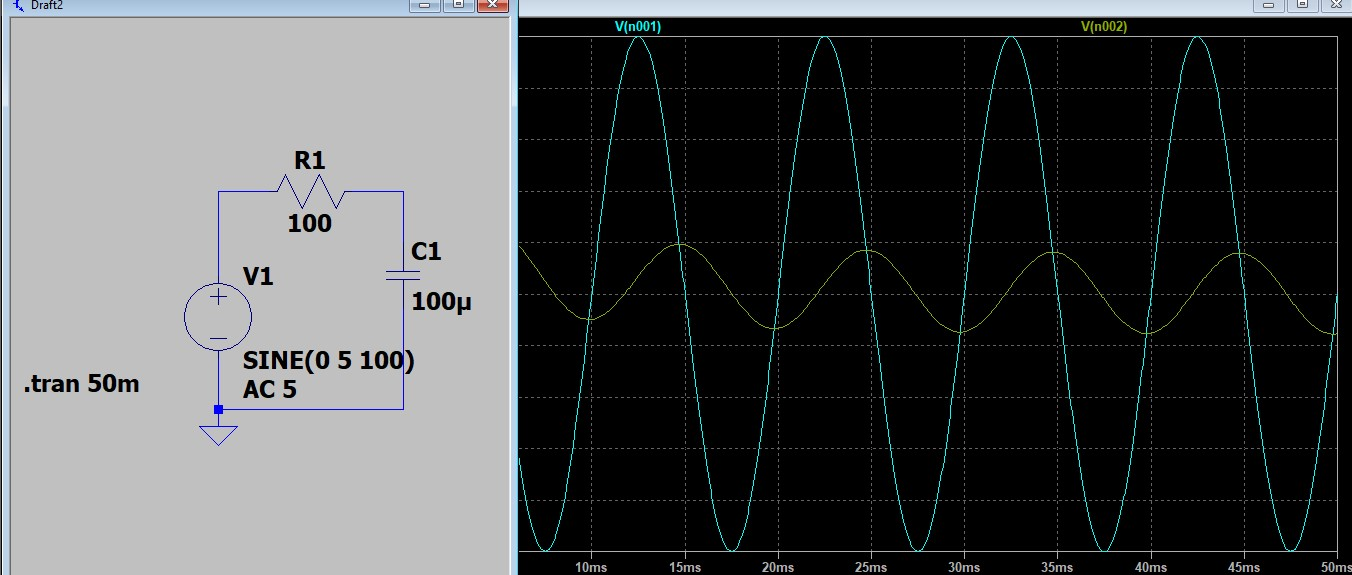

In [20]:
scene2 = canvas()

g1 = graph(title="Voltages", xtitle='Time', ytitle='Volts', background=color.black)
V1 = gcurve(graph=g1, color=color.red, width=2, label='Va')
V2 = gcurve(graph=g1, color=color.green, width=2, label='Vb')

amp = 5
frequency = 1000
vs = Source(amp, frequency)

t = 0
dt = 5e-6

V_i = 0
I_eq = 0
Va = 0
Vb = 0
I_vi = 0

<IPython.core.display.Javascript object>

In [ ]:
# For every time step 
while(t <= .03):
    
    # calculate new Vi = V0 * sin(wt)
    V_i = vs.get_volt(t)
    
    # calculate new Ieq = -(C/dt)*v(t) from previous Vb
    I_eq = -(cap/dt)*Vb
    
    # solve x = inv(A) * b
    A = np.matrix([ [-1/r, 1/r, 1],[1/r, -(1/r)-(cap/dt), 0],[1, 0, 0] ] )
    b = np.matrix([ [0],[I_eq],[V_i] ])
    x = np.linalg.solve(A,b)
    
    Va = x.item(0)
    Vb = x.item(1)
    I_vi = x.item(2)
    
    t += dt
    
    # plot
    V1.plot(t, Va)
    V2.plot(t, Vb)
    

# This simulation used the same values except a frequency of 1 kHz.  Output again matches similarly but there is slight discrepancy with voltages.

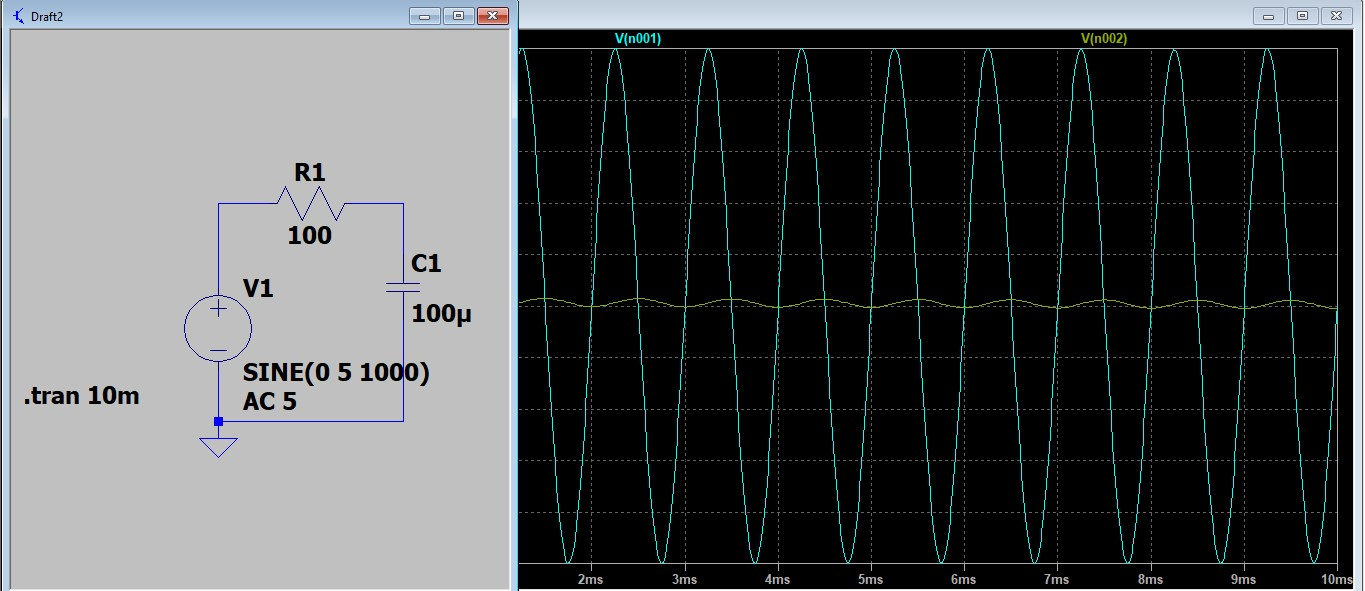

# Half Wave Rectifier

In [37]:
g1 = graph(title="Voltages", xtitle='Time', ytitle='Volts', background=color.black)
V1 = gcurve(graph=g1, color=color.red, width=2, label='Vb')

In [38]:
scene3 = canvas()

<IPython.core.display.Javascript object>

In [39]:
amp = 5
frequency = 1000
cap = 1e-9
r = 100e3

Va = 0
Vb = 0
V_T = 25e-3
I_vi = 0
I_s = 1e-9
n = 1

t = 0
dt = 1e-3
dtn = 1e-3

ac = Source(amp, frequency)

while(t <= .2):
    
    # update values
    V_D = Vb - Va
    V_i = ac.get_volt(t)
    
    I_Ceq = -cap/dt * Vb
    
    G_Deq = I_s / (n * V_T) * math.exp(V_D / (n * V_T))
    
    I_D = I_s * (math.exp(V_D / (n * V_T)) - 1)
    
    I_Deq = I_D - G_Deq * V_D
    
    # solve inv(A)*b
    A = np.matrix([ [-G_Deq, G_Deq, 1], [G_Deq, -G_Deq - cap/dt - 1/r, 0], [1, 0, 0] ])
    b = np.matrix([ [I_Deq], [I_Ceq - I_Deq], [V_i] ])
    x = np.linalg.solve(A, b)
    
    # store updated values
    Va = x.item(0)
    Vb = x.item(1)
    I_vi = x.item(2)
    
    VD_n = Vb - Va
    
    # Check for convergence of diode voltage <0.001 V difference from previous voltage
    if(abs(VD_n - (V_D)) >= .001):
        
        if(dtn >= dt/10):
            dtn -= dt/10
            continue
      
    t += dtn
    dtn = dt # reset time step
    
    V1.plot(t, abs(Vb))

# As Tau gets smaller, the peak voltage gets smaller.  Simulation results are again similar with SPICE but voltage values are different.

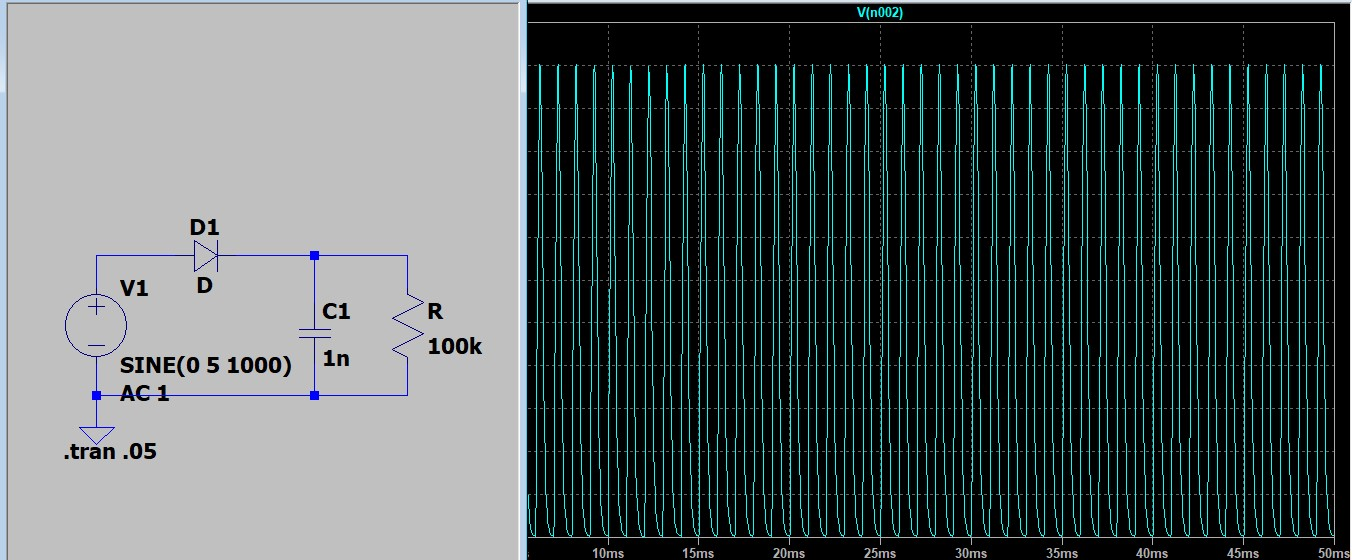